In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Data upload

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML_Lectures2\possum.csv")

Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       102 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   103 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     103 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  103 non-null    float64
 11  eye       102 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [8]:
df.isnull().sum()

case        0
site        0
Pop         2
sex         0
age         2
hdlngth     1
skullw      0
totlngth    0
taill       1
footlgth    1
earconch    1
eye         2
chest       0
belly       0
dtype: int64

Data Preprocessing

In [3]:
num_col = df.select_dtypes(include='number').columns

Handling missing values

In [4]:
skewness = df[num_col].skew()
print(f"Skewness: {skewness}")

Skewness: case        0.000000
site        0.187788
age         0.539160
hdlngth    -0.038621
skullw      1.007540
totlngth   -0.285266
taill       0.181395
footlgth    0.092043
earconch    0.147618
eye         0.301456
chest      -0.055511
belly       0.073975
dtype: float64


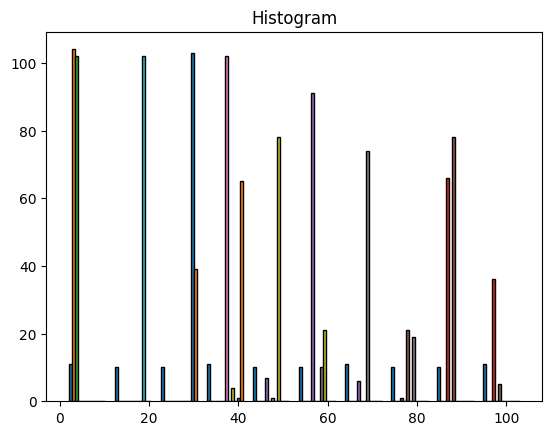

In [16]:
plt.hist(df[num_col], bins=10, edgecolor='k')
plt.title('Histogram')
plt.show()

In [4]:
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)

In [18]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Encoding

In [5]:
cat_col = df.select_dtypes(include='object').columns
le = LabelEncoder()
cardinality = df[cat_col].nunique()

for col in cat_col:
  if cardinality[col] >= 4:
    df[cat_col] = le.fit_transform(df[cat_col])
  else:
    df = pd.get_dummies(df, columns=[col], dtype=int, drop_first=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       104 non-null    int64  
 1   site       104 non-null    int64  
 2   age        104 non-null    float64
 3   hdlngth    104 non-null    float64
 4   skullw     104 non-null    float64
 5   totlngth   104 non-null    float64
 6   taill      104 non-null    float64
 7   footlgth   104 non-null    float64
 8   earconch   104 non-null    float64
 9   eye        104 non-null    float64
 10  chest      104 non-null    float64
 11  belly      104 non-null    float64
 12  Pop_other  104 non-null    int64  
 13  sex_m      104 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.5 KB


In [24]:
df.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,1
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0


Scaling

In [6]:
scaler = StandardScaler()

# x = df.drop(columns=['age'])
# y = df['age']

# x_scaled = scaler.fit_transform(x)
# x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
# df = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)


df[num_col] = scaler.fit_transform(df[num_col])

In [9]:
df.head()

,case,site,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other,sex_m,age
0,-1.715476,-1.122867,0.435828,1.134883,0.445603,-0.513444,1.387779,1.555612,0.173188,0.491222,1.241874,-1.122884,0.839594,8.0
1,-1.682166,-1.122867,-0.017323,0.231197,1.028384,-0.256722,0.928309,0.748480,0.967128,0.736833,0.150424,-1.122884,-1.191052,6.0
2,-1.648855,-1.122867,0.407506,1.005785,1.960834,1.026888,1.594541,0.919690,0.470915,1.473667,0.514241,-1.122884,-1.191052,6.0
3,-1.615545,-1.122867,0.180930,0.069825,1.144941,0.513444,1.755355,0.993065,0.173188,0.491222,0.514241,-1.122884,-1.191052,6.0
4,-1.582235,-1.122867,-0.300542,-0.188371,-0.370290,-0.513444,0.583706,1.237651,0.073945,0.736833,0.150424,-1.122884,-1.191052,2.0


In [7]:
x = df.drop(columns=['case', 'age'])
y = df['age']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

Model Training

In [ ]:
# model = RandomForestRegressor(random_state=42)
# model = DecisionTreeRegressor(random_state=42)
# model = LinearRegression()
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=10)

# model

LGBMRegressor(max_depth=10)

In [ ]:
rf_model = model.fit(x_train, y_train)
rf_model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 12
[LightGBM] [Info] Start training from score -0.059766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor(max_depth=10)

In [10]:
y_pred = rf_model.predict(x_val)

In [11]:
mse = mean_squared_error(y_val, y_pred)
print(f"{mse: .2f}")

 1.08


In [12]:
r2 = r2_score(y_val, y_pred)
print(f"{r2: .2f}")

 0.20


In [ ]:
# 1st result using RandomForestRegressor
# mse: 1.09
# r2: 0.18

# 2nd result using DecisionTreeRegressor
# mse: 1.07
# r2: 0.20

# 3rd result using LinearRegression
# mse: 1.87
# r2: -0.38

# 4th result using LGBMRegressor
# mse: 3.81
# r2: 0.20

Using a different method to decsribe result

In [24]:
models = {
  "LinearRegression": LinearRegression(),
  "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42),
}

results = []
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)

  mse = mean_squared_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)

  results.append({"Model": name, "MSE score": mse, "R2 Score": r2})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=True)

In [25]:
results_df

,Model,MSE score,R2 Score
0,LinearRegression,1.873963,-0.383979
1,Random Forest,1.108602,0.181263
2,Decision Tree,0.811631,0.400586
